# Car Sales Data Analysis Project 

This project focuses on analyzing car sales data to derive insights into various aspects of the sales process, including sales trends, top-selling models, dealer performance, regional sales distribution, and more.

## Purpose of the Project

The purpose of this project is to gain actionable insights from car sales data to inform decision-making processes in the automotive industry. By analyzing historical sales data, we aim to understand sales trends, customer preferences, dealer performance, and other factors influencing car sales.
 

### Importing Libraries and Loading Data

In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar

In [2]:
### Loading Data
df=pd.read_csv('Car Sales.csv')

In [3]:
df.head() ### for showing top 5 rows

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,02-01-2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,02-01-2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,02-01-2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,02-01-2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,02-01-2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [4]:
df.columns  ### check name of columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

### Data Preprocessing

In [5]:
### drop unnecessary columns 
df.drop(['Car_id','Customer Name','Phone','Dealer_No '],axis=1, inplace=True)

In [6]:
### extracted features 'Month' and 'Year' from the 'Date' column for analysis.
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

### Data information

In [7]:
df.isnull().sum() ### check of null values

Date             0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Body Style       0
Dealer_Region    0
Month            0
Year             0
dtype: int64

In [8]:
df.size

334684

In [9]:
df.shape  ### dimensionality of the data

(23906, 14)

**Number of rows** - 23906

**Number of columns** - 14

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23906 non-null  datetime64[ns]
 1   Gender         23906 non-null  object        
 2   Annual Income  23906 non-null  int64         
 3   Dealer_Name    23906 non-null  object        
 4   Company        23906 non-null  object        
 5   Model          23906 non-null  object        
 6   Engine         23906 non-null  object        
 7   Transmission   23906 non-null  object        
 8   Color          23906 non-null  object        
 9   Price ($)      23906 non-null  int64         
 10  Body Style     23906 non-null  object        
 11  Dealer_Region  23906 non-null  object        
 12  Month          23906 non-null  int64         
 13  Year           23906 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 2.6+ MB


In [11]:
df.dtypes

Date             datetime64[ns]
Gender                   object
Annual Income             int64
Dealer_Name              object
Company                  object
Model                    object
Engine                   object
Transmission             object
Color                    object
Price ($)                 int64
Body Style               object
Dealer_Region            object
Month                     int64
Year                      int64
dtype: object

In [12]:
df.describe()

,Annual Income,Price ($),Month,Year
count,2.390600e+04,23906.000000,23906.000000,23906.000000
mean,8.308403e+05,28090.247846,7.852924,2022.554714
std,7.200064e+05,14788.687608,3.257985,0.497008
min,1.008000e+04,1200.000000,1.000000,2022.000000
25%,3.860000e+05,18001.000000,5.000000,2022.000000
50%,7.350000e+05,23000.000000,9.000000,2023.000000
75%,1.175750e+06,34000.000000,11.000000,2023.000000
max,1.120000e+07,85800.000000,12.000000,2023.000000


In [13]:
df[df.duplicated()]  ### Check Duplicates 

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region,Month,Year


In [14]:
df.columns

Index(['Date', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', 'Price ($)', 'Body Style',
       'Dealer_Region', 'Month', 'Year'],
      dtype='object')

# Data Visualization

#### Monthly Car Sales Count by Year
**conclusions**
- The most number of cars were sold in September, November, and December in both 2022 and 2023.

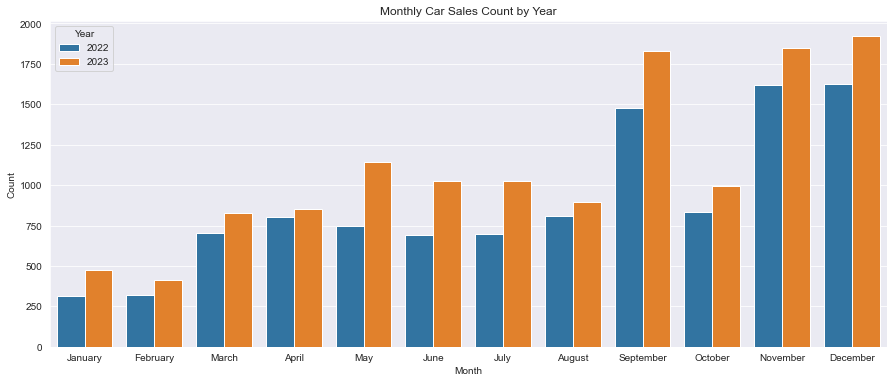

In [15]:
grouped_data = df.groupby(['Month','Year']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
ax=sns.barplot(data=grouped_data, x='Month', y='count', hue='Year')
ax.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])
plt.legend(title='Year')
plt.title('Monthly Car Sales Count by Year')
plt.xlabel('Month')    
plt.ylabel('Count')
plt.show()

#### Monthly Sales Trends Comparison by Year
**conclusions**
- There was an increase in sales from 2022 to 2023, with a percentage change of approximately 23.59%

In [16]:
salesyear2022 = df[df['Year'] == 2022]['Price ($)'].sum()
salesyear2023 = df[df['Year'] == 2023]['Price ($)'].sum()
sales_percentage = ((salesyear2023 - salesyear2022) / salesyear2022) * 100
print("Sales percentage change:", sales_percentage, "%")

Sales percentage change: 23.588164620374265 %


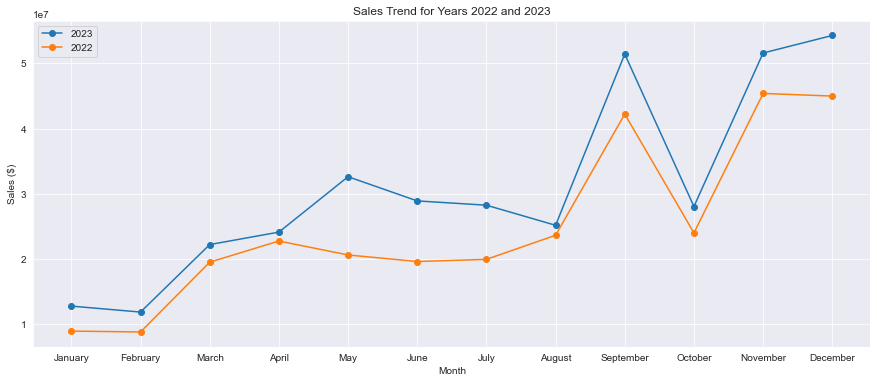

In [17]:
monthly_sales=df.groupby(['Year','Month'])['Price ($)'].sum().reset_index()
plt.figure(figsize=(15,6))
for year in df['Year'].value_counts().index:
    year_sales=monthly_sales[monthly_sales['Year']==year]
    plt.plot(year_sales['Month'],year_sales['Price ($)'],marker='o', label=str(year))

plt.title('Sales Trend for Years 2022 and 2023')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)])
plt.legend()
plt.grid(True)
plt.show()

#### Sales Distribution by Car Brand
**conclusions**
- Chevrolet, Dodge, and Ford sold the highest number of cars

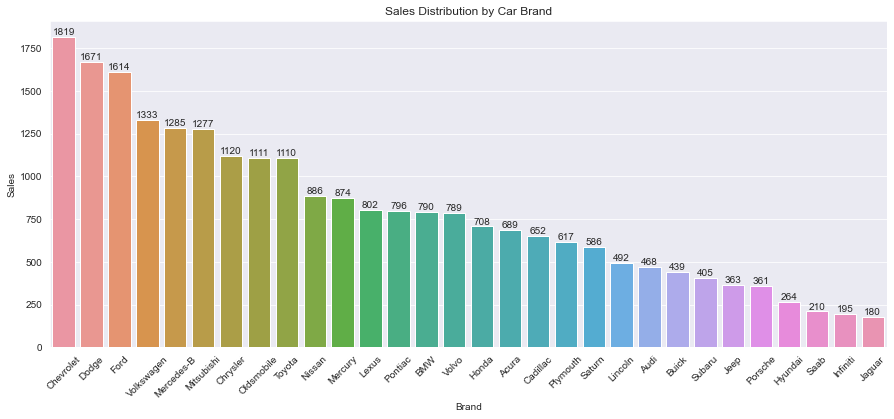

In [18]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
company_count=df.Company.value_counts()
ax=sns.barplot(x=company_count.index,y=company_count.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Brand')
plt.ylabel('Sales')
plt.title('Sales Distribution by Car Brand')
plt.xticks(rotation=45)
plt.show()

#### Top selling company for each month
**conclusion**
- Chevrolet was the top-selling car company most months.

In [19]:
monthly_sales=df.groupby(['Year','Month','Company']).size().reset_index(name='Total Sales')
top_selling_per_month=monthly_sales.loc[monthly_sales.groupby(['Year','Month'])['Total Sales'].idxmax()]
top_selling_per_month['Year-Month'] = top_selling_per_month['Year'].astype(str) + '-' + top_selling_per_month['Month'].astype(str)
year_month_list = top_selling_per_month['Year-Month'].tolist()

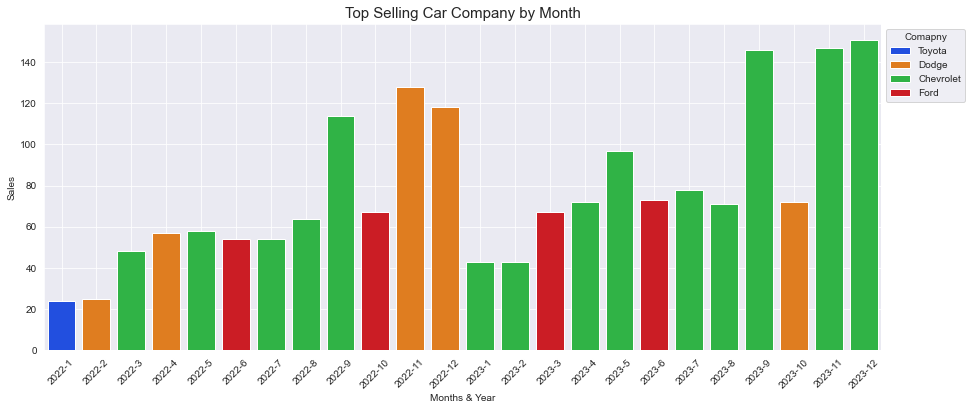

In [20]:
colors=sns.color_palette("bright")
plt.figure(figsize=(15,6))
ax=sns.barplot(data=top_selling_per_month,x=top_selling_per_month.index,y='Total Sales', hue='Company', dodge=False ,palette=colors)
ax.set_xticklabels([i for i in year_month_list])
plt.xlabel('Months & Year')
plt.ylabel('Sales')
plt.title('Top Selling Car Company by Month', fontsize=15)
plt.xticks(rotation=45)
plt.legend(title='Comapny', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Top Selling Car Model by Company

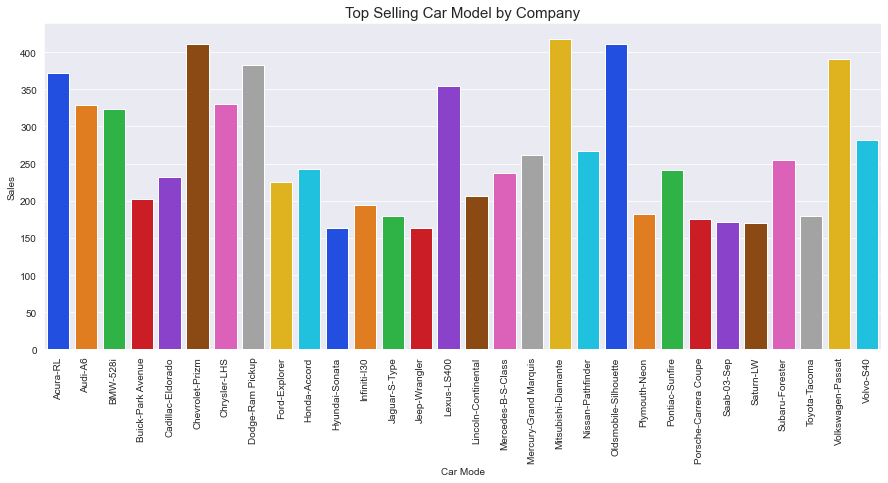

In [21]:
models=df.groupby(['Company','Model',]).size().reset_index(name='MaxModelSales')

Max_Model_Sales=models.loc[models.groupby(['Company'])['MaxModelSales'].idxmax()]
Max_Model_Sales['CM']=Max_Model_Sales['Company']+'-'+Max_Model_Sales['Model']
Max_Model_Sales_list=Max_Model_Sales['CM'].tolist()

colors=sns.color_palette("bright")
plt.figure(figsize=(15,6))

ax=sns.barplot(data=Max_Model_Sales,x=Max_Model_Sales_list,y='MaxModelSales', dodge=False ,palette=colors)
ax.set_xticklabels([i for i in Max_Model_Sales_list])
plt.xlabel('Car Mode')
plt.ylabel('Sales')
plt.title('Top Selling Car Model by Company', fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Dealer Sales Performance
**conclusion**
- These are the top 10 dealers with good sales:
1. Rabun Used Car Sales
2. Progressive Shippers Cooperative 
3. U-Haul CO
4. Race Car Help
5. Saab-Belle Dodge
6. Scrivener Performance Engineering
7. Star Enterprises Inc
8. Tri-State Mack Inc
9. Suburban Ford
10. Ryder Truck Rental and Leasing


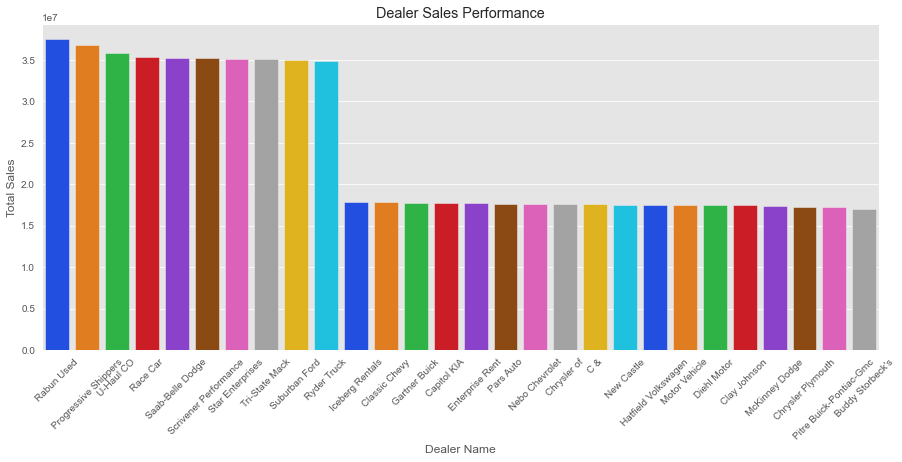

In [22]:
dealer=df.groupby('Dealer_Name')['Price ($)'].sum().sort_values(ascending=False)
dealer = dealer.reset_index()
dealer['Dealer_Name'] = dealer['Dealer_Name'].apply(lambda x: ' '.join(x.split()[:2]))

plt.figure(figsize=(15, 6))
plt.style.use('ggplot')
colors=sns.color_palette("bright")
ax=sns.barplot(x=dealer['Dealer_Name'],y=dealer['Price ($)'] ,palette=colors)
plt.xlabel('Dealer Name')
plt.ylabel('Total Sales')
plt.title('Dealer Sales Performance')
plt.xticks(rotation=45)
plt.show()

#### Sales Distribution by Region
**conclusion**
- These are the top three regions of sales:
    1. Austin 
    2. Janesville 
    3. Scottsdale

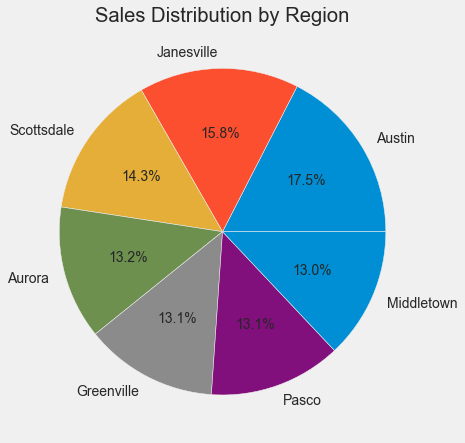

In [23]:
region_sales=df.groupby('Dealer_Region')['Price ($)'].sum().sort_values(ascending=False).head(15)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(7,7))
plt.pie(region_sales,labels=region_sales.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Region')
plt.show()

#### Gender Analysis & Price Distribution
**conclusion**
- Males buy more cars than females.

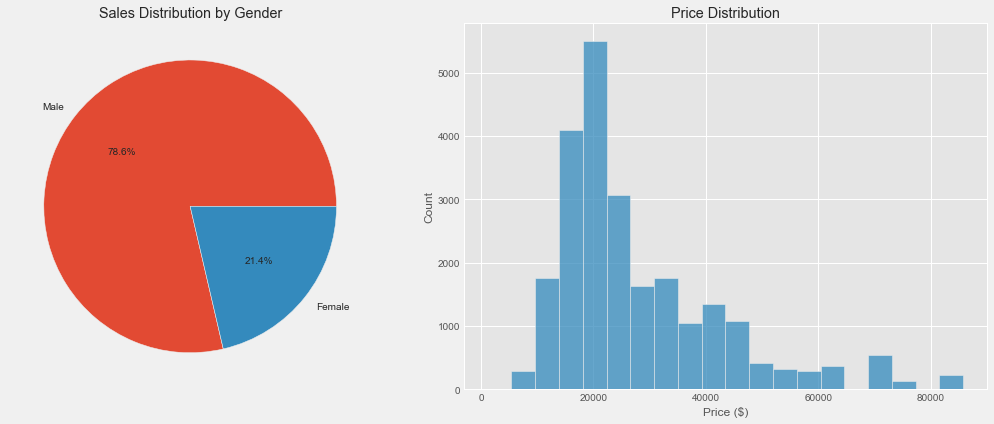

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.style.use('ggplot')

gender_counts = df['Gender'].value_counts()
plt.subplot(1, 2, 1)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Gender')


plt.subplot(1, 2, 2)
plt.style.use('ggplot')
sns.histplot(data=df, x='Price ($)', bins=20)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Count')

plt.tight_layout()  
plt.show()


#### Top 10 Counts of Annual Income
**conclusion**
1. The majority of the customers have an annual income of 13500, with a count of 5273.
2. The next most common annual incomes are in the range of 600,000 to 1,300,000, with counts ranging from 128 to 162.

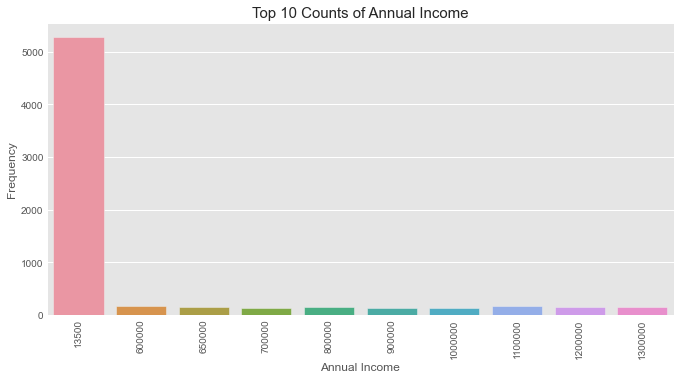

In [25]:
price_vs_income=df['Annual Income'].value_counts().head(10)

plt.figure(figsize=(10, 5))
ax=sns.barplot(x=price_vs_income.index,y=price_vs_income.values)
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Top 10 Counts of Annual Income', fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Engine Preferences

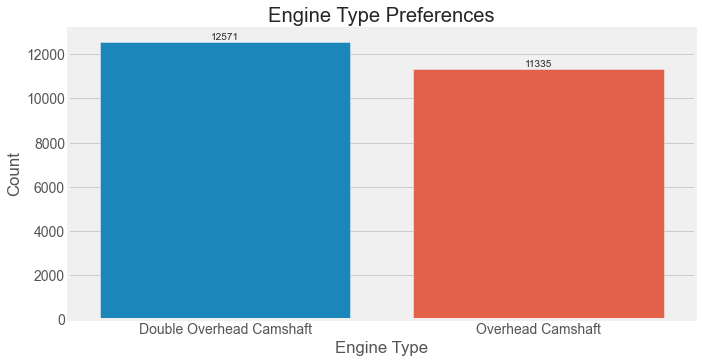

In [26]:
plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
ax=sns.countplot(data=df, x='Engine')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Engine Type Preferences')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.show()


#### Color Popularity & Popular Body Style
**conclusion**
- The most popular color is pale white
- The most popular body styles are hatchback and SUV.

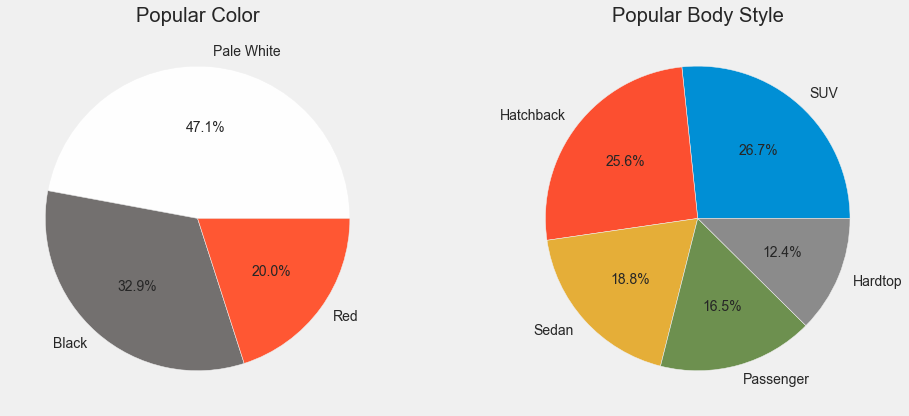

In [27]:
plt.figure(figsize=(15, 6))
plt.style.use('fivethirtyeight')

colors=df.Color.value_counts()
plt.subplot(1, 2, 1) 
colo=["#FeFeFe", "#73706f", "#FF5733"]
plt.pie(colors.values, labels=colors.index, colors=colo,autopct='%1.1f%%' )
plt.title('Popular Color')

body=df['Body Style'].value_counts()
plt.subplot(1, 2, 2) 
plt.pie(body.values, labels=body.index, autopct='%1.1f%%')
plt.title('Popular Body Style')

plt.tight_layout()  
plt.show()